# Проект: Линейные модели в машинном обучении

## Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. 

Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
* Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
* Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
* средний удой за год — не менее 6000 килограммов;
* молоко должно быть вкусным.

Вы будете работать с тремя датасетами:
- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv

1. Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
* id — уникальный идентификатор коровы.
* Удой, кг — масса молока, которую корова даёт в год (в килограммах).
* ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
* Сырой протеин, г — содержание сырого протеина в корме (в граммах).
* СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Жирность,% — содержание жиров в молоке (в процентах).
* Белок,% — содержание белков в молоке (в процентах).
* Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете ferma_main.csv можно разделить на группы.
* Характеристики коровы: id, Порода, порода папы_быка, Возраст.
* Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
* Характеристика пастбища: Тип пастбища.
* Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

2. Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
* id — уникальный идентификатор коровы.
* Имя Папы — имя папы коровы.

3. Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Имя_папы — имя папы коровы.
* Текущая_жирность,% — содержание жиров в молоке (в процентах).
* Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
* Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
* Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
* Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

## Загрузка и первичный обзор данных

In [1]:
!pip install phik -q
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as st

from sklearn.preprocessing import (StandardScaler, OneHotEncoder )
from sklearn.linear_model import (LinearRegression, LogisticRegression)
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            mean_absolute_error, mean_squared_error,
                            precision_score,
                            recall_score,
                            r2_score)

import warnings
import phik

warnings.filterwarnings("ignore")
mpl.style.use(['bmh'])

In [2]:
try:
    df_main = pd.read_csv('ferma_main.csv', sep=';', decimal = ',')
except:
    df_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal = ',')

In [3]:
try:
    df_dad = pd.read_csv('ferma_dad.csv', sep=';', decimal = ',')
except:
    df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal = ',')

In [4]:
try:
    df_buy = pd.read_csv('cow_buy.csv', sep=';')
except:
    df_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal = ',')

**df_main (ferma_main.csv)**

In [5]:
df_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Предоставленные данные соответствуют заявленному описанию. Однако,  названия столбцов не соответствуют принятым стандартам оформления.  Необходимо выполнить переименование столбцов.

In [6]:
df_main.columns = ['id', 'milk_yield_kg', 'efu', 'raw_protein_g', 
                   'spr', 'breed', 'pasture_type', 'father_breed', 
                   'fat_percent', 'protein_percent', 'milk_taste', 'age']

df_main.columns

Index(['id', 'milk_yield_kg', 'efu', 'raw_protein_g', 'spr', 'breed',
       'pasture_type', 'father_breed', 'fat_percent', 'protein_percent',
       'milk_taste', 'age'],
      dtype='object')

Столбцы датафрейма df_main были переименованы для лучшей читаемости и соответствия стандартам. Новые названия столбцов приведены ниже:
* id: без изменений
* milk_yield_kg:  "Удой" переведено как  "milk yield" (количество молока) и добавлено уточнение "kg" (килограммы).
* efu: "ЭКЕ (Энергетическая кормовая единица)" можно сократить до "EFU" (Energy feed unit).
* raw_protein_g: "Сырой протеин" переведено как "raw protein" и добавлено уточнение "g" (граммы).
* spr:  "СПО" (Сахаро-протеиновое соотношение)  можно сократить до "SPR" (Sugar-Protein Ratio).
* breed: "Порода" переведено как "breed".
* pasture_type: "Тип пастбища" переведено как "pasture type".
* father_breed: "порода папы_быка" переведено как "father_breed" (порода отца-быка).
* fat_percent: "Жирность,%" переведено как "fat percentage".
* protein_percent: "Белок,%" переведено как "protein percentage".
* milk_taste: "Вкус молока" переведено как "milk taste".
* age: "Возраст" переведено как "age".

In [7]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               634 non-null    int64  
 1   milk_yield_kg    634 non-null    int64  
 2   efu              634 non-null    float64
 3   raw_protein_g    634 non-null    int64  
 4   spr              634 non-null    float64
 5   breed            634 non-null    object 
 6   pasture_type     634 non-null    object 
 7   father_breed     634 non-null    object 
 8   fat_percent      634 non-null    float64
 9   protein_percent  634 non-null    float64
 10  milk_taste       634 non-null    object 
 11  age              634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


Пропуски в данных отсутствуют. Однако, обнаружено несоответствие типов данных в столбцах efu, spr, fat_percent и protein_percent. Ожидался тип float, но фактически тип данных — object.


Рассмотрим описательные статистики для трех числовых столбцов.

In [8]:
df_main.describe()

,id,milk_yield_kg,efu,raw_protein_g,spr,fat_percent,protein_percent
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,183.096982,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,159.250000,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,317.500000,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,475.750000,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,629.000000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


При анализе данных выявлены следующие потенциальные проблемы:
* Количество строк в датафрейме (634) не соответствует максимальному значению ID (629),  что может свидетельствовать о наличии дубликатов.
*  Обнаружено экстремальное значение удоя - 45616 кг,  которое значительно превышает медианное значение (6130 кг)  и может являться аномалией.

**df_dad (ferma_dad.csv)**

In [9]:
df_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Данные соответствуют заявленному описанию.

Чтобы название столбца соответствовало  стилю snake_case,  переименуем  "Имя Папы" в father_name.

In [10]:
df_dad.columns = ['id', 'father_name']

In [11]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           629 non-null    int64 
 1   father_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


В результате анализа данных установлено отсутствие пропусков и соответствие типов данных.

**df_buy (cow_buy.csv)**

In [12]:
df_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Данные соответствуют описанию. Однако необходимо переименовать столбцы аналогично предыдущим датафреймам.

In [13]:
df_buy.columns = ['breed', 'pasture_type', 'father_breed', 
                  'father_name', 'fat_percent', 'protein_percent', 'age']

df_buy.columns

Index(['breed', 'pasture_type', 'father_breed', 'father_name', 'fat_percent',
       'protein_percent', 'age'],
      dtype='object')

In [14]:
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            20 non-null     object 
 1   pasture_type     20 non-null     object 
 2   father_breed     20 non-null     object 
 3   father_name      20 non-null     object 
 4   fat_percent      20 non-null     float64
 5   protein_percent  20 non-null     float64
 6   age              20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


На данный момент у фермера 629 коров (исходя из максимального ID), и он планирует приобрести еще 20.

Пропусков в данных нет, однако, как и в df_main, типы данных в столбцах fat_percent и protein_percent не соответствуют ожидаемым.

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> в ходе первичного обзора данных, представленных в трех датафреймах (df_main, df_buy, df_dad), были выявлены следующие особенности и потенциальные проблемы:

1. df_main (ferma_main.csv): Основные данные о коровах

* Переименование столбцов:  Для соответствия стандартам именования и повышения читаемости, столбцы были переименованы.
* Несоответствие типов данных:  В столбцах efu, spr, fat_percent и protein_percent  обнаружено несоответствие типов данных (ожидался float, фактический тип - object).
* Потенциальные проблемы:
    * Дубликаты:  Возможно наличие дубликатов, так как количество строк (634) превышает максимальный ID (629).
    * Аномальные значения:  Обнаружено экстремальное значение удоя (45616 кг),  которое может быть аномалией.


2. df_buy (cow_buy.csv): Данные о планируемой покупке

* Переименование столбцов:  Для соответствия стандартам именования и повышения читаемости, столбцы были переименованы.
* Количество коров:  Фермер планирует приобрести 20 коров, что увеличит общее поголовье до 649.
* Несоответствие типов данных:  Аналогично df_main,  в столбцах fat_percent и protein_percent обнаружено несоответствие типов данных (ожидался float, фактический тип - object).


3. df_dad (ferma_dad.csv): Данные об отцах коров

* Переименование столбца:  Столбец "Имя Папы" был переименован в father_name для соответствия стилю snake_case.
* Качество данных:  Данные соответствуют описанию, пропуски отсутствуют, типы данных корректны.

</div>

##  Предобработка данных

В рамках предыдущего этапа анализа данных было установлено отсутствие пропусков во всех трех рассматриваемых датафреймах.  Следовательно,  следующим этапом  является обработка дубликатов и  приведение типов данных к требуемому формату.

**Oбработка дубликатов**

In [15]:
df_main.duplicated().sum()

5

In [16]:
df_main.drop_duplicates(inplace=True)
df_main['id'].describe()

count    629.00000
mean     315.00000
std      181.72094
min        1.00000
25%      158.00000
50%      315.00000
75%      472.00000
max      629.00000
Name: id, dtype: float64

Каждый ID теперь уникален и соответствует одной записи в данных.

Проанализируем датафреймы df_main и df_buy на наличие неявных дубликатов.

In [17]:
odject_list = ['breed', 'pasture_type', 'father_breed', 'milk_taste', 'age']

for column in odject_list:
    print(f'Уникальные значения для переменной {column}: {df_main[column].unique()}')

Уникальные значения для переменной breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения для переменной pasture_type: ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения для переменной father_breed: ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения для переменной milk_taste: ['вкусно' 'не вкусно']
Уникальные значения для переменной age: ['более_2_лет' 'менее_2_лет']


Обнаружена проблема неявных дубликатов в данных. В переменной pasture_type значения Равнинное и Равнинные фактически дублируют друг друга. Аналогичная ситуация наблюдается в переменной father_breed со значениями Айдиал и Айдиалл.

In [18]:
df_main['pasture_type'].replace('Равнинные', 'Равнинное', regex=True, inplace=True)
df_main['father_breed'].replace('Айдиалл', 'Айдиал', regex=True, inplace=True)

In [19]:
odject_list = ['pasture_type', 'father_breed']

for column in odject_list:
    print(f'Уникальные значения для переменной {column}: {df_main[column].unique()}')

Уникальные значения для переменной pasture_type: ['Равнинное' 'Холмистое']
Уникальные значения для переменной father_breed: ['Айдиал' 'Соверин']


In [20]:
odject_list = ['breed', 'pasture_type', 'father_breed', 'father_name', 'age']

for column in odject_list:
    print(f'Уникальные значения для переменной {column}: {df_buy[column].unique()}')

Уникальные значения для переменной breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения для переменной pasture_type: ['холмистое' 'равнинное']
Уникальные значения для переменной father_breed: ['Айдиал' 'Соверин']
Уникальные значения для переменной father_name: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Уникальные значения для переменной age: ['более_2_лет' 'менее_2_лет']


Обнаружено несоответствие в регистре первой буквы для уникальных значений pasture_type в разных датафреймах. Для обеспечения единообразия, будет использован метод capitalize().

In [21]:
df_buy['pasture_type'] = df_buy['pasture_type'].str.capitalize()

In [22]:
df_buy['pasture_type'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

## Исследовательский анализ данных

Разработаем функцию get_info с двумя аргументами: датафрейм и имя столбца.  Функция будет генерировать график для указанного столбца и предоставлять его статистическое описание.

In [31]:
def get_info(df, column):
    if df[column].dtypes == 'int64' or df[column].dtypes == 'float64':
        print(df[column].describe())
        
        fig = plt.figure(figsize=(15, 8))
        grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
        
        ax_main = fig.add_subplot(grid[:-1, :-1])
        ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
        
        ax_main.hist(df[column], bins=(df.shape[0] // 10), edgecolor='black')
        sns.boxplot(df[column], ax=ax_bottom)
        ax_main.set(title='Распределение признака ' + column, ylabel='Количество наблюдений')
        
    else:
        print(df[column].value_counts())
        plt.hist(df[column], edgecolor='black')
        plt.xlabel('Распределение признака ' + column)
        plt.ylabel('Количество наблюдений')
        plt.grid(True)

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: milk_yield_kg, dtype: float64


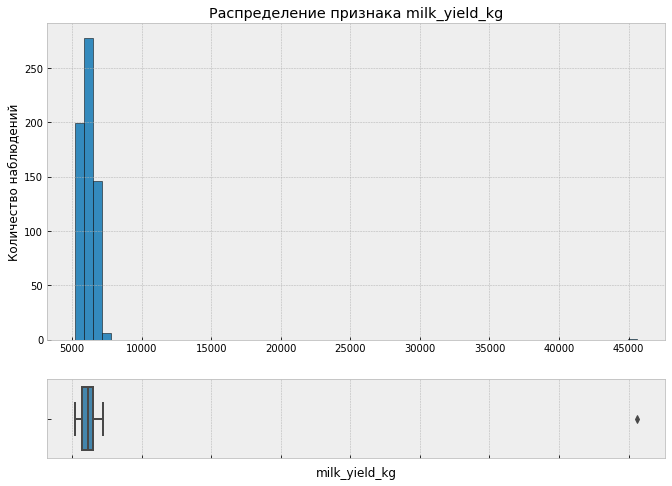

In [32]:
get_info(df_main, 'milk_yield_kg')

In [33]:
df_main[df_main['milk_yield_kg'] > 10000]

,id,milk_yield_kg,efu,raw_protein_g,spr,breed,pasture_type,father_breed,fat_percent,protein_percent,milk_taste,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


Обнаружено одно аномальное наблюдение.  Замена его на среднее значение может исказить результаты модели,  так как этот признак является целевым.  Поэтому,  наиболее целесообразным решением будет удаление этого наблюдения.

In [34]:
df_main = df_main[df_main['milk_yield_kg'] < 10000]

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: milk_yield_kg, dtype: float64


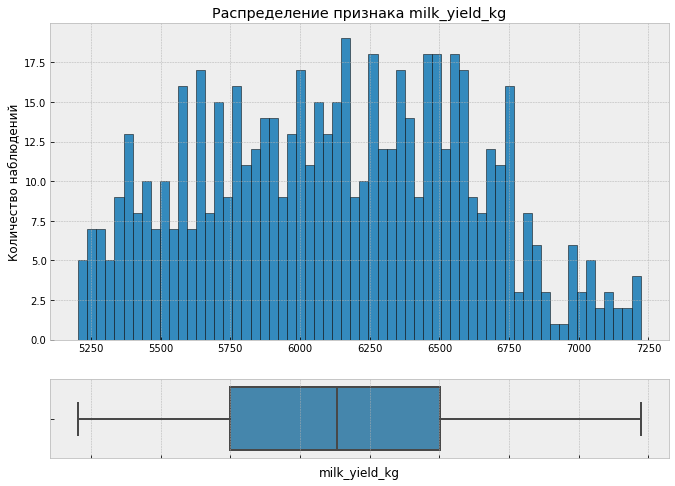

In [35]:
get_info(df_main, 'milk_yield_kg')

* Средний удой молока составляет 6125.97 кг.
* Данные распределены относительно нормально,  судя по близости среднего значения и медианы.
*  Существует некоторый разброс в данных,  что отражается в стандартном отклонении 475.86 кг.
*  Минимальный и максимальный удои молока  —  5204 кг и 7222 кг  соответственно.

Обратим внимание на максимальное и минимальное значения удоя молока и изучим их подробнее.

In [36]:
df_main[df_main['milk_yield_kg'] > 6900]

,id,milk_yield_kg,efu,raw_protein_g,spr,breed,pasture_type,father_breed,fat_percent,protein_percent,milk_taste,age
27,28,7028,16.4,2303,0.95,РефлешнСоверинг,Холмистое,Айдиал,3.70,3.077,вкусно,более_2_лет
32,33,6930,15.7,1788,0.94,РефлешнСоверинг,Холмистое,Айдиал,3.72,3.079,вкусно,более_2_лет
44,45,7061,16.4,2041,0.96,Вис Бик Айдиал,Холмистое,Айдиал,3.72,3.079,вкусно,более_2_лет
46,47,7173,16.7,2146,0.95,РефлешнСоверинг,Холмистое,Айдиал,3.72,3.075,вкусно,более_2_лет
60,61,6924,16.4,2121,0.95,РефлешнСоверинг,Холмистое,Айдиал,3.72,3.075,вкусно,более_2_лет
70,71,7222,16.8,2157,0.95,Вис Бик Айдиал,Холмистое,Айдиал,3.70,3.076,вкусно,более_2_лет
95,96,6976,16.4,2263,0.95,Вис Бик Айдиал,Холмистое,Айдиал,3.71,3.078,вкусно,более_2_лет
135,136,7207,16.6,2343,0.94,Вис Бик Айдиал,Холмистое,Айдиал,3.72,3.078,вкусно,более_2_лет
174,175,7043,15.7,2041,0.94,Вис Бик Айдиал,Холмистое,Айдиал,3.71,3.074,вкусно,более_2_лет
176,177,7141,16.5,2082,0.94,Вис Бик Айдиал,Холмистое,Айдиал,3.71,3.075,вкусно,более_2_лет


Высокий удой молока (более 6900 кг)  связан с типом пастбища (холмистое), породой отца ("Айдиал") и возрастом (более 2 лет).

In [37]:
df_main[df_main['milk_yield_kg'] < 5300]

,id,milk_yield_kg,efu,raw_protein_g,spr,breed,pasture_type,father_breed,fat_percent,protein_percent,milk_taste,age
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
30,31,5242,11.8,1764,0.885,Вис Бик Айдиал,Холмистое,Айдиал,3.21,3.078,вкусно,менее_2_лет
75,76,5281,12.8,1769,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.48,3.072,вкусно,менее_2_лет
145,146,5263,12.3,1960,0.850,Вис Бик Айдиал,Равнинное,Соверин,3.44,3.072,не вкусно,менее_2_лет
227,228,5283,12.5,1879,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.27,3.076,вкусно,менее_2_лет
256,257,5287,12.3,1929,0.890,РефлешнСоверинг,Равнинное,Соверин,3.27,3.076,не вкусно,менее_2_лет
273,274,5204,12.3,2021,0.890,РефлешнСоверинг,Холмистое,Соверин,3.27,3.075,вкусно,менее_2_лет
289,290,5284,12.4,1694,0.890,Вис Бик Айдиал,Холмистое,Соверин,3.38,3.073,не вкусно,менее_2_лет
322,323,5215,13.1,1741,0.840,РефлешнСоверинг,Равнинное,Соверин,3.18,3.070,не вкусно,менее_2_лет
383,384,5268,12.5,1889,0.890,РефлешнСоверинг,Холмистое,Соверин,3.34,3.072,вкусно,менее_2_лет


 Низкий удой молока может быть связан с возрастом (все коровы младше двух лет) и, возможно, с породой отца (в большинстве случаев порода отца - "Соверин",  но есть и коровы с отцом породы "Айдиал"). 

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: efu, dtype: float64


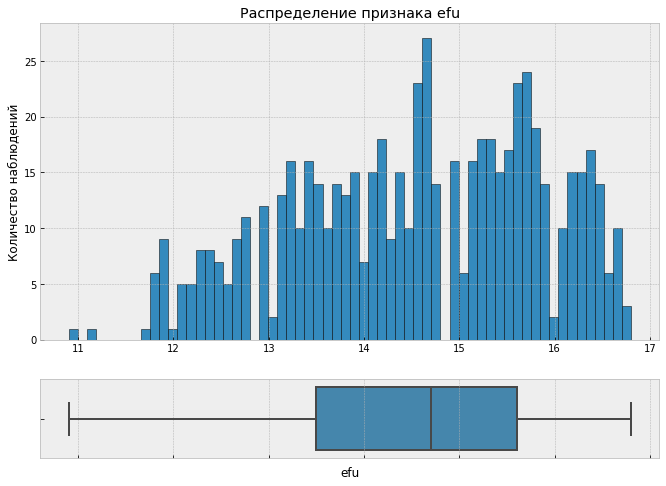

In [38]:
get_info(df_main, 'efu')

В целом,  данные  указывают  на  достаточно  хорошее  и  однородное  качество  кормления  коров,  о  чем  свидетельствует  среднее  значение  ЭКЕ  14.55  и  небольшое  стандартное  отклонение. Наличие  минимального  значения  10.9  ЭКЕ  требует  внимания.

Энергетическая кормовая единица (ЭКЕ) рассчитывается для каждой коровы отдельно и расзависит от множества факторов:
* Стадия лактации:  Потребность коровы в энергии меняется в зависимости от стадии лактации.  В начале лактации потребность в энергии выше,  что может потребовать кормов с более высоким ЭКЕ.
* Беременность:  Беременные коровы также имеют повышенную потребность в энергии.
* Возраст:  Молодые и старые коровы могут иметь  отличные от  взрослых коров  потребности в энергии.
* Физическая активность:  Коровы,  которые больше двигаются,  также тратят больше энергии.

In [39]:
df_main[df_main['efu'] < 11.5]

,id,milk_yield_kg,efu,raw_protein_g,spr,breed,pasture_type,father_breed,fat_percent,protein_percent,milk_taste,age
456,457,5288,11.1,1925,0.88,РефлешнСоверинг,Равнинное,Соверин,3.33,3.074,не вкусно,менее_2_лет
581,582,5573,10.9,1955,0.84,Вис Бик Айдиал,Холмистое,Соверин,3.39,3.079,вкусно,менее_2_лет


 Возраст этих коров (менее 2 лет) вероятно объясняет их низкую потребность в ЭКЕ.

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: raw_protein_g, dtype: float64


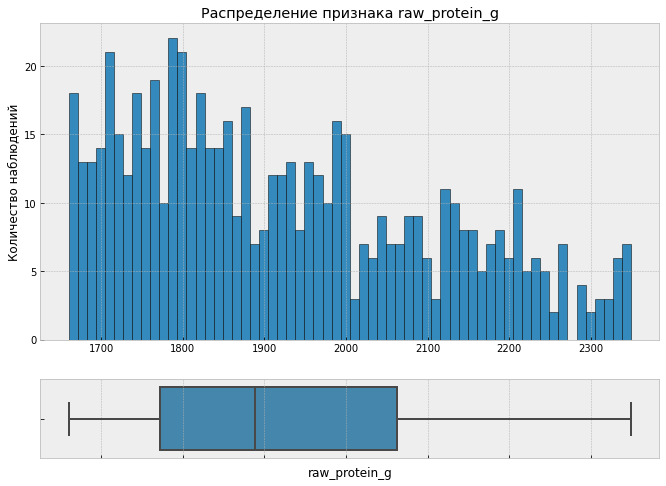

In [40]:
get_info(df_main, 'raw_protein_g')

 Сырой протеин является важным компонентом рациона, необходимым для роста, развития и продуктивности животных. В целом, данные указывают на достаточно высокое и относительно однородное содержание сырого протеина в корме для исследуемой группы коров.  Среднее содержание сырого протеина в корме в данной выборке составляет 1923.76 г. Минимальное значение (min): 1660 г. Максимальное значение (max): 2349 г. 

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: spr, dtype: float64


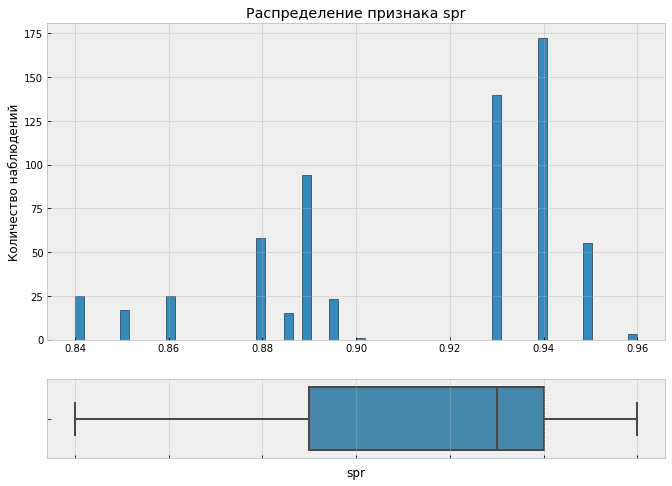

In [41]:
get_info(df_main, 'spr')

В целом,  данные  указывают  на  достаточно  сбалансированное  СПО  в  корме  для коров,  о  чем  свидетельствует  среднее  значение  0.91  и  небольшое  стандартное  отклонение.

Вис Бик Айдиал     372
РефлешнСоверинг    256
Name: breed, dtype: int64


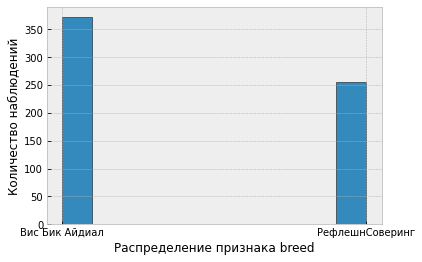

In [42]:
get_info(df_main, 'breed')

Порода "Вис Бик Айдиал" встречается в 372 записях из 628, что составляет более половины выборки.  

Холмистое    350
Равнинное    278
Name: pasture_type, dtype: int64


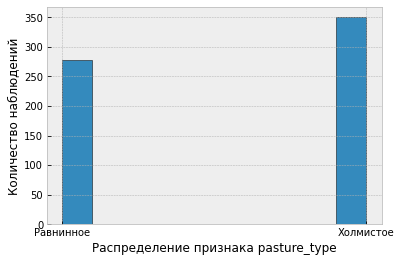

In [43]:
get_info(df_main, 'pasture_type')

Тип пастбища "Холмистое" встречается в 350 записях из 628, что составляет более половины выборки.  Следовательно,  оставшиеся 278 записей относятся к типу пастбища "Равнинное". 

Айдиал     317
Соверин    311
Name: father_breed, dtype: int64


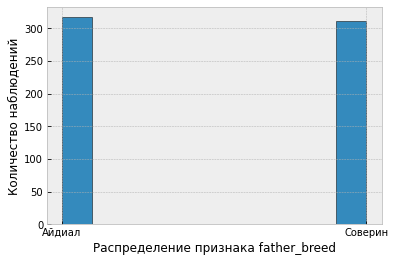

In [44]:
get_info(df_main, 'father_breed')

Порода отца "Айдиал" встречается в 317 записях из 628.  Следовательно,  оставшиеся 311 записей относятся к породе отца "Соверин".

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_percent, dtype: float64


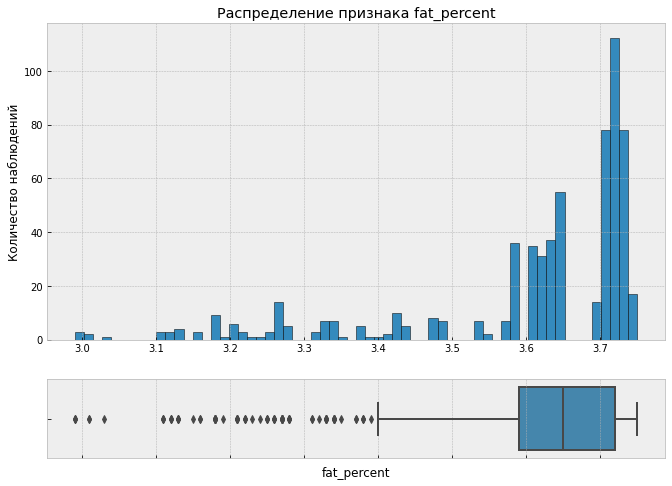

In [45]:
get_info(df_main, 'fat_percent')

* Среднее значение (mean): 3.60%.  Это говорит о том, что средний процент жира в молоке в данной выборке составляет 3.60%.
* Стандартное отклонение (std): 0.17%.  Это относительно небольшое значение,  что указывает на  незначительный  разброс  данных  вокруг  среднего  значения  и  относительно  однородную  жирность  молока.
* Минимальное значение (min): 2.99%.  Это  самое  низкое  значение  жирности  молока  в  выборке.
* Максимальное значение (max): 3.75%.  Это  самое  высокое  значение  жирности  молока  в  выборке.

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein_percent, dtype: float64


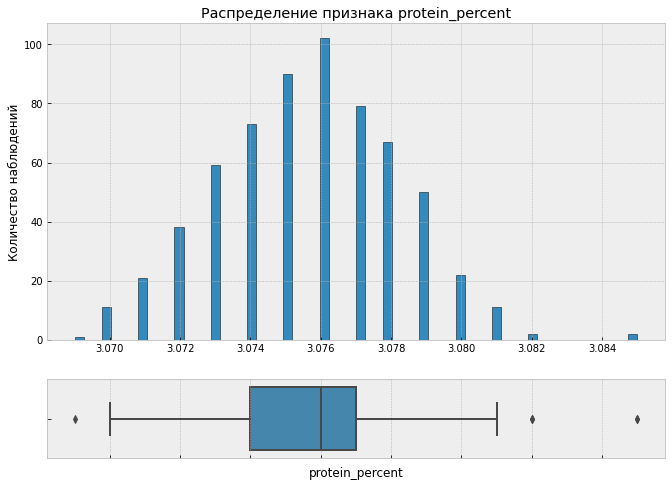

In [46]:
get_info(df_main, 'protein_percent')

* Среднее значение (mean): 3.075670. Это говорит о том, что среднее значение показателя в данной выборке составляет 3.075670.
* Стандартное отклонение (std): 0.002551.  Это очень маленькое значение, что указывает на чрезвычайно низкий разброс данных вокруг среднего значения и высокую однородность исследуемого показателя.
* Минимальное значение (min): 3.069000. Это самое низкое значение показателя в выборке.
* Максимальное значение (max): 3.085000. Это самое высокое значение показателя в выборке.

вкусно       370
не вкусно    258
Name: milk_taste, dtype: int64


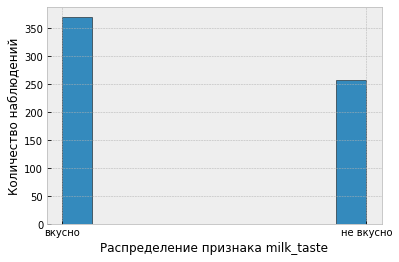

In [47]:
get_info(df_main, 'milk_taste')

Значение вкуса "вкусно" встречается в 370 записях из 628.  Следовательно,  оставшиеся 258 записей относятся к значению вкуса "не вкусно".  

более_2_лет    518
менее_2_лет    110
Name: age, dtype: int64


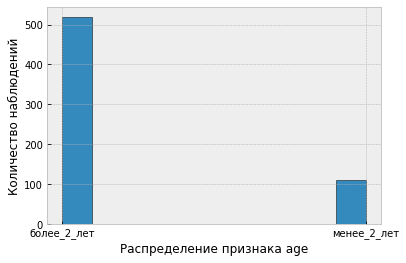

In [48]:
get_info(df_main, 'age')

Значение возраста "более_2_лет" встречается в 518 записях из 628, что составляет более 80% выборки. 

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: father_name, dtype: int64


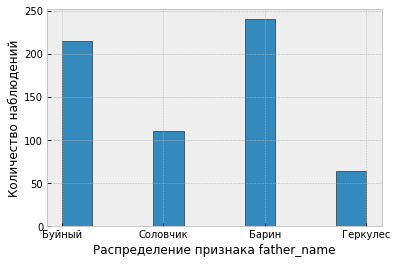

In [49]:
get_info(df_dad, 'father_name')

Ключевые наблюдения:

* Барин:  Является  самым  распространенным  быком-производителем  с  240  потомками.
* Буйный:  Занимает  второе  место  по  распространенности  с  215  потомками.
* Соловчик:  Находится  на  третьем  месте  со  110  потомками.
* Геркулес:  Является  на  наименее  распространенным  быком-производителем  с  64  потомками.

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> проведенный исследовательский  анализ данных выявил следующие ключевые особенности:

1. Удой молока:

* Средний удой молока составляет 6125.97 кг, что свидетельствует о достаточно хорошей продуктивности коров.
* Обнаружено одно аномальное наблюдение, которое было удалено для избежания искажения результатов модели.
* Данные об удое молока распределены относительно нормально.

2. Качество кормления:

* Среднее значение ЭКЕ (14.55) и содержание сырого протеина (1923.76 г) указывают на достаточно хорошее и однородное качество кормления.
* Минимальное значение ЭКЕ (10.9) требует внимания и может потребовать корректировки рациона для отдельных коров.

3. Состав молока:

* Средний процент жира в молоке составляет 3.60%, что соответствует нормальным показателям.
* Жирность молока относительно однородна.

4. Порода, тип пастбища и возраст:

* Преобладающей породой является "Вис Бик Айдиал" (более половины выборки).
* Более половины коров пасутся на холмистом пастбище.
* Большинство коров имеют возраст более 2 лет (более 80% выборки).

5. Вкус молока:

* Большинство проб молока имеют оценку "вкусно", однако значительная часть (258 из 628) оценена как "не вкусно".  

6. Быки-производители:

* Барин и Буйный являются наиболее распространенными быками-производителями в данной выборке.</div>

## Корреляционный анализ

Для исследования взаимосвязи между целевыми признаками (milk_yield_kg и milk_taste) и остальными переменными, проведем анализ корреляции с использованием матрицы корреляций, построенной на основе библиотеки phik.

In [50]:
df_main.head(1)


,id,milk_yield_kg,efu,raw_protein_g,spr,breed,pasture_type,father_breed,fat_percent,protein_percent,milk_taste,age
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет


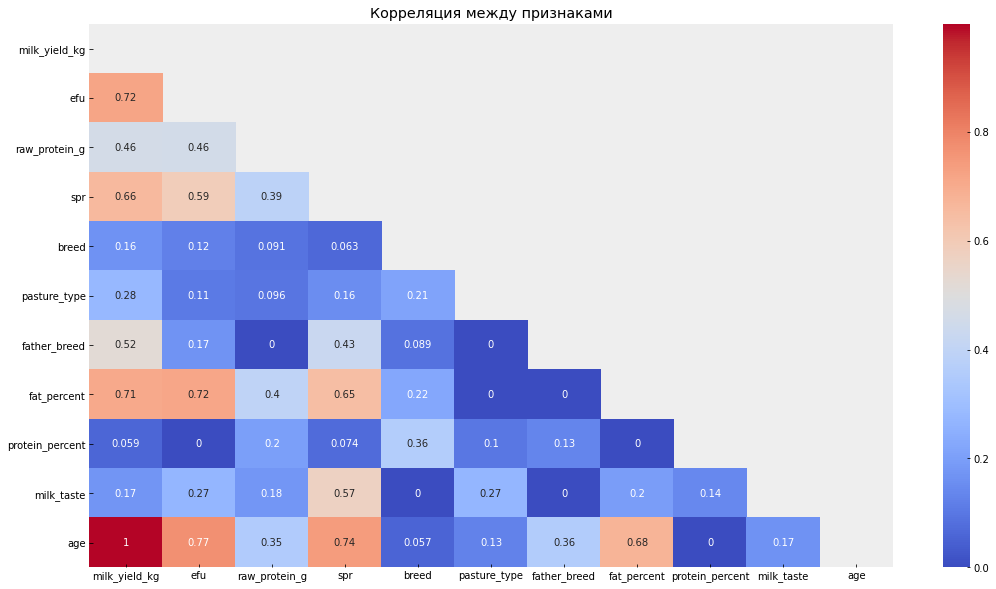

In [51]:
phik_matrix = df_main.drop('id', axis=1).phik_matrix(interval_cols=['milk_yield_kg','efu',
                                                                    'raw_protein_g','spr',
                                                                    'fat_percent', 'protein_percent'])

mask = np.triu(np.ones_like(phik_matrix, dtype=bool))

plt.figure(figsize=(18, 10))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Корреляция между признаками')
plt.show()

 Исследование корреляций на основе построенной матрицы выявило следующие закономерности.  Удой молока (milk_yield_kg)  проявляет наибольшую связь с возрастом коровы (age,  коэффициент корреляции 1).  Также наблюдается высокая корреляция удоя с эффективностью использования корма (efu, 0.72), процентом жира в молоке (fat_precent, 0.71), содержанием  отношение сахара к протеину в корме (spr, 0.66), породой отца (tather_breed, 0.52) и количеством сырого протеина в рационе (raw_protein_g, 0.46). Вкус молока (milk_taste)  демонстрирует менее выраженные корреляции.  Наиболее сильная связь наблюдается с содержанием соматических клеток (spr, 0.57),  затем с эффективностью использования корма (efu, 0.27) и типом пастбища (pasture_type, 0.27).

В статистике мультиколлинеарность описывает ситуацию,  когда две или более независимых переменных в регрессионной модели имеют высокую корреляцию друг с другом.  Это может происходить по нескольким причинам: включение в модель переменных, измеряющих  одно и то же, недостаточный объем данных, приводящий к ложной корреляции,  или  некорректное  построение модели,  например,  включение  переменных, являющихся  линейными комбинациями  других.  В данном  исследовании,  анализ  корреляционной матрицы показал наличие умеренной корреляции  между  некоторыми  входными  признаками,  что  не  является  критичным  и  не  указывает  на  явную  мультиколлинеарность.

 Для построения диаграмм рассеяния, отображающих зависимость "Удоя, кг" от количественных признаков с учетом значений категориальных признаков, напишем функцию get_scatter.  Эта функция принимает название категориального признака в качестве аргумента и генерирует отдельные диаграммы рассеяния для каждого количественного признака, где точки данных группируются и окрашиваются в соответствии со значениями указанного категориального признака.

In [52]:
def get_scatter(object_column):

    numeric_columns = ['efu', 'raw_protein_g', 'spr', 'fat_percent', 'protein_percent']

    plt.figure(figsize=(20, 14))
    
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(2, 3, i)
        sns.scatterplot(data=df_main, x=column, y='milk_yield_kg', hue=object_column)
        plt.title(f'milk_yield_kg и {column} для {object_column}')
    
    plt.tight_layout()
    plt.show()


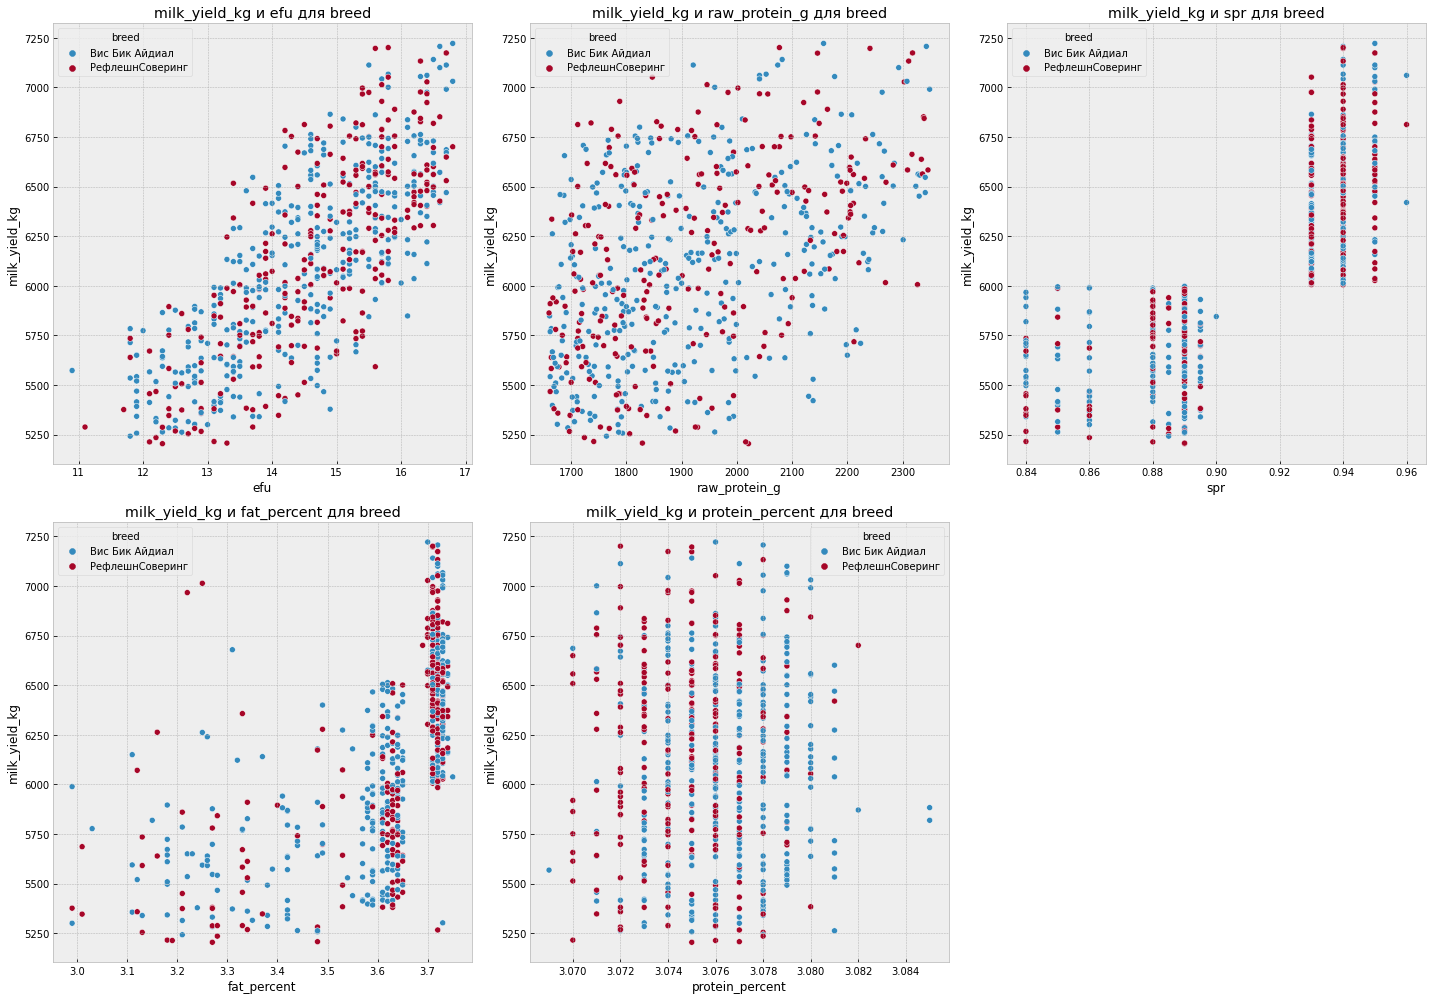

In [53]:
get_scatter('breed')

Что насчет  типа взаимосвязи между целевым и входными признаками:
*  Между milk_yield_kg и efu существует заметная прямая, но нелинейная связь.
*  milk_yield_kg и raw_protein связаны слабой прямой линейной зависимостью.
*  Взаимосвязь между milk_yield_kg и spr также нелинейна и характеризуется переломным моментом около значения 0.92. Возможно, в дальнейшем стоит рассмотреть возможность преобразования spr в категориальный признак.
*  milk_yield_kg и fat_percent демонстрируют видимую линейную связь.
*  Связь между milk_yield_kg и protein_percent не прослеживается.

Корреляция между milk_yield_kg и breed незаметна.

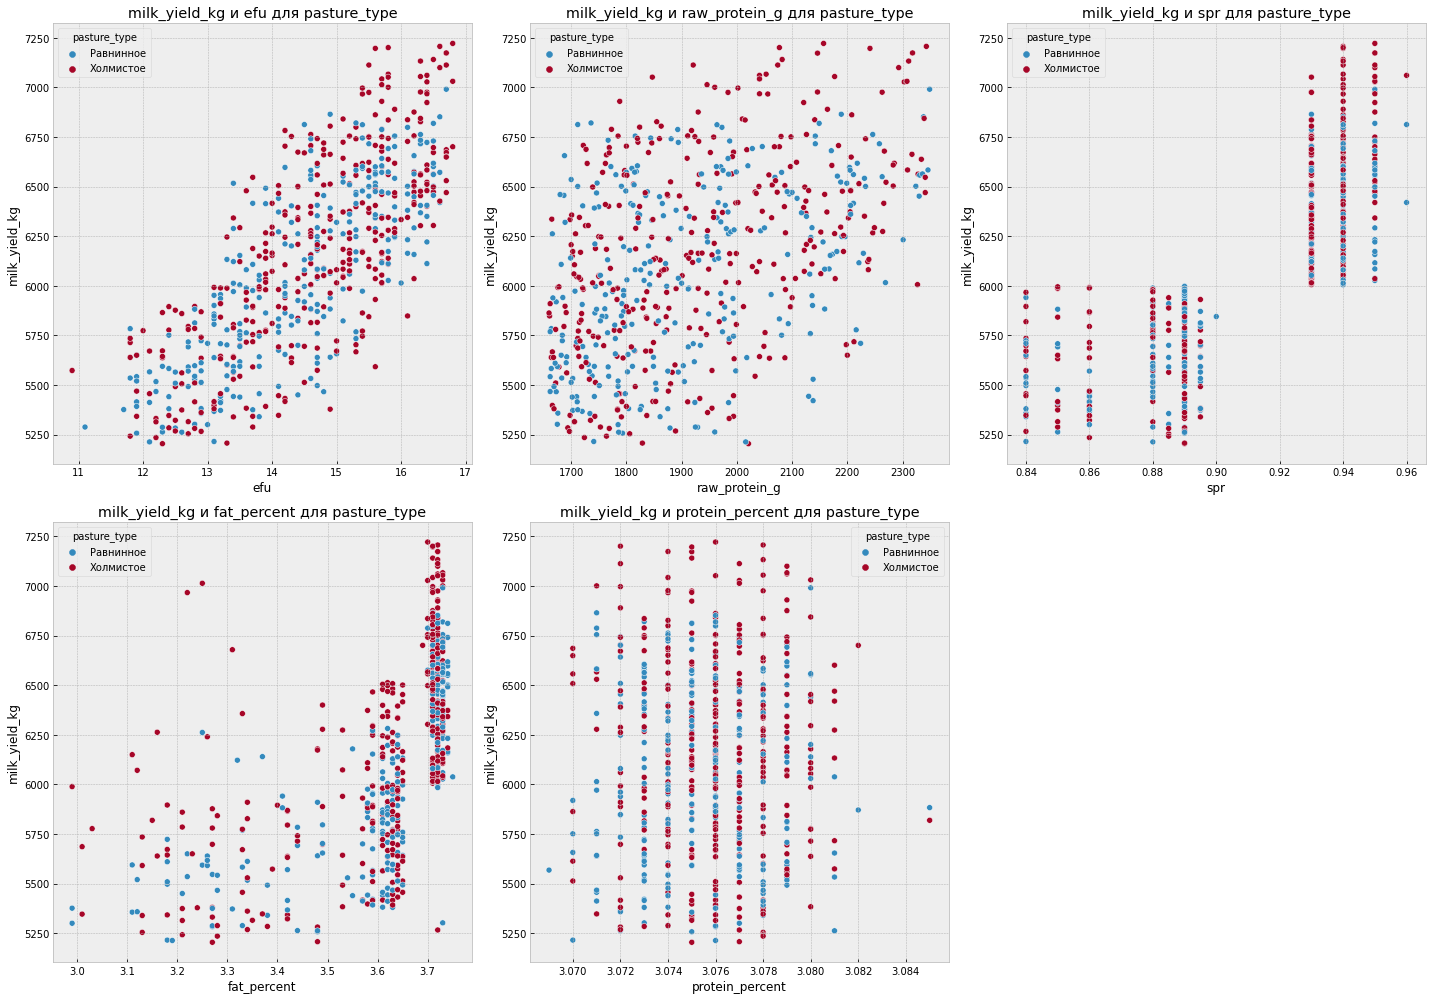

In [54]:
get_scatter('pasture_type')

Корреляция между milk_yield_kg и pasture_type незаметна.

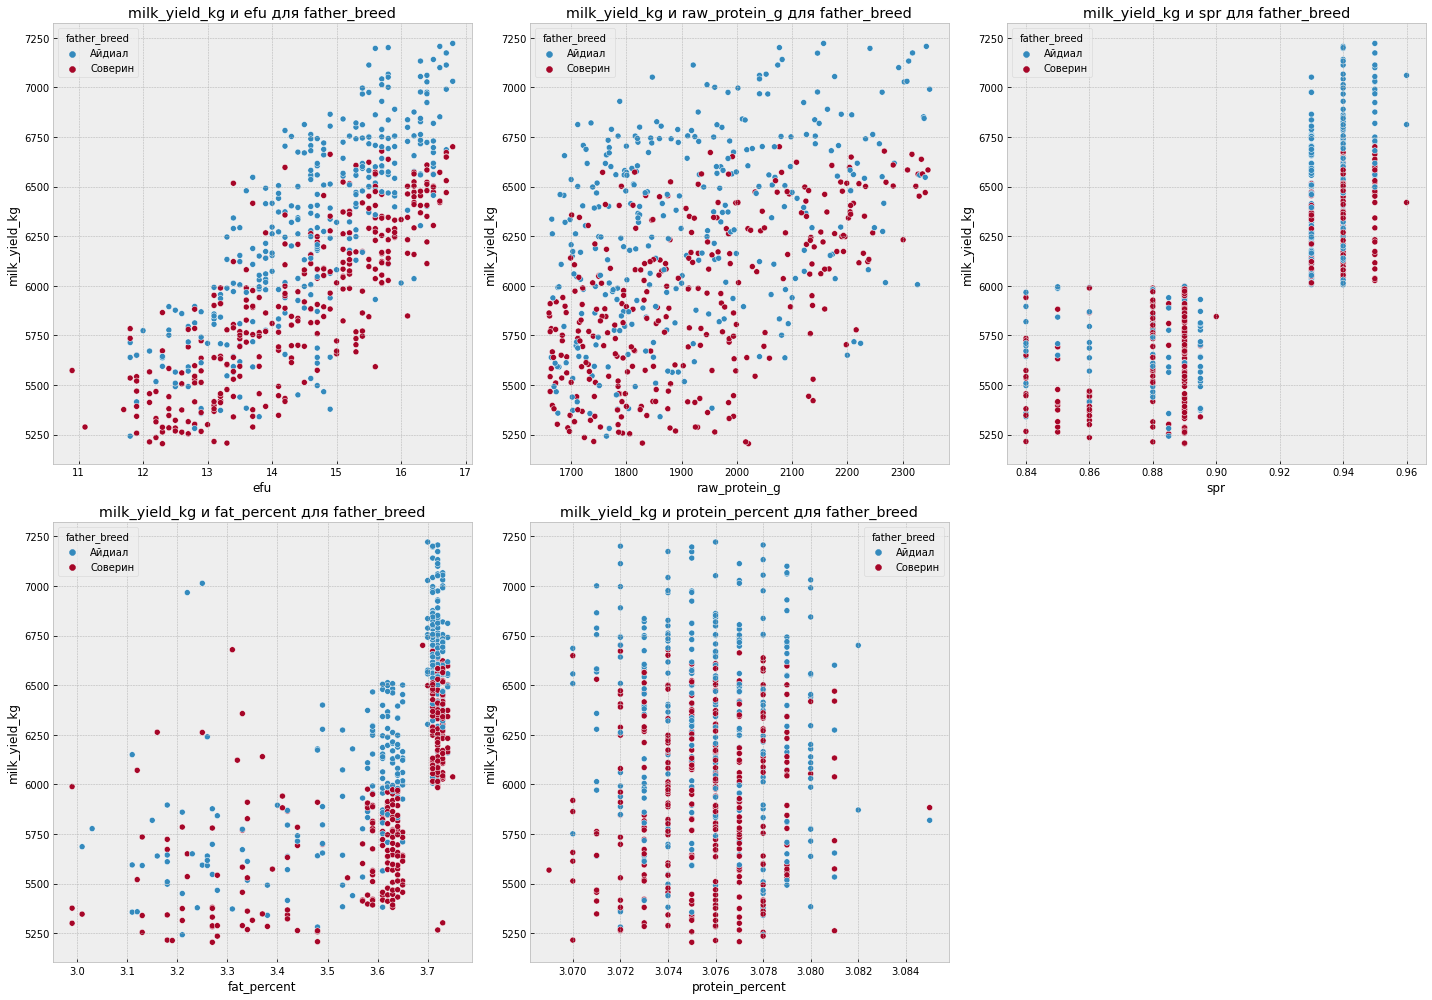

In [55]:
get_scatter('father_breed')

Корреляция между milk_yield_kg и father_breed заметна. Коровы с отцом Айдал демонстрируют более высокий удой молока.

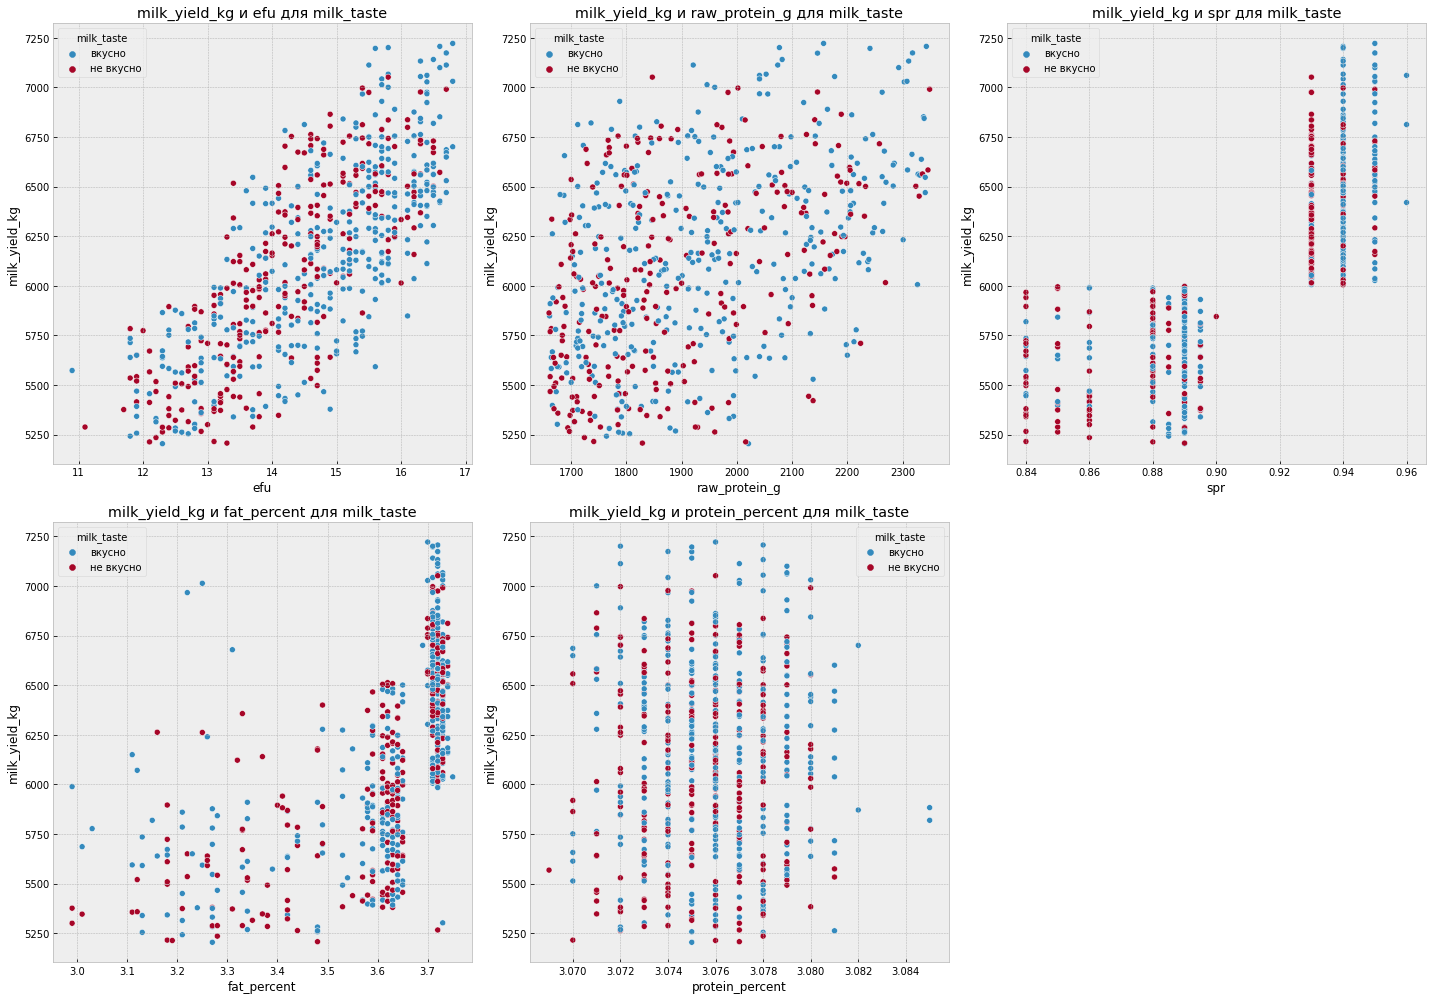

In [56]:
get_scatter('milk_taste')

Корреляция между milk_yield_kg и milk_taste незаметна.

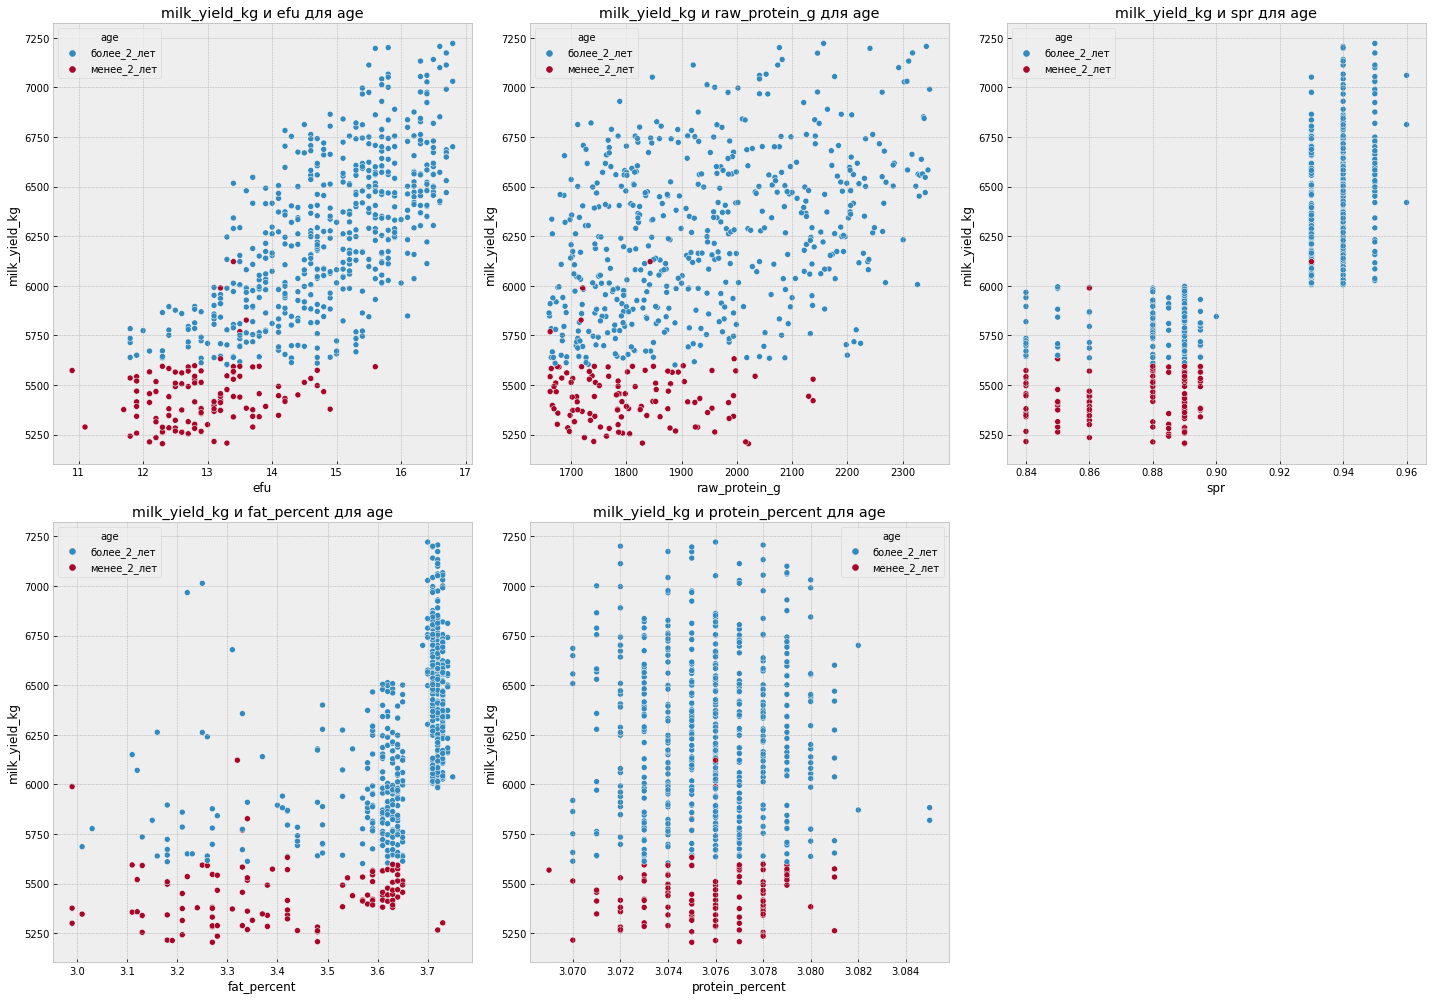

In [57]:
get_scatter('age')

Корреляция между milk_yield_kg и father_breed заметна. Коровы с возрастом более 2х лет демонстрируют более высокий удой молока.

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> проведенное исследование позволило выявить ряд важных закономерностей, связывающих удой молока (milk_yield_kg) и его вкусовые качества (milk_taste) с различными факторами.

Удой молока (milk_yield_kg) наиболее сильно коррелирует с возрастом коровы (age), эффективностью использования корма (efu), процентом жира в молоке (fat_percent),  отношением сахара к протеину в корме (spr), породой отца (father_breed) и количеством сырого протеина в рационе (raw_protein_g).  

Вкус молока (milk_taste)  демонстрирует менее выраженные корреляции, наиболее заметные из которых связаны с содержанием соматических клеток (spr), эффективностью использования корма (efu) и типом пастбища (pasture_type).

Анализ характера взаимосвязей показал:

* Нелинейную зависимость удоя молока от  эффективности использования корма (efu) и взаимосвязь между milk_yield_kg и spr также нелинейна и характеризуется переломным моментом около значения 0.92. Возможно, в дальнейшем стоит рассмотреть возможность преобразования spr в категориальный признак.
* Слабую линейную зависимость  удоя молока от количества сырого протеина в рационе (raw_protein).
* Линейную зависимость  удоя молока от процента жира в молоке (fat_percent).
* Отсутствие связи  удоя молока с процентом белка в молоке (protein_percent).

Особо следует отметить влияние породы отца и возраста коровы на удой:

* Коровы с отцом Айдал демонстрируют более высокий удой молока.
* Коровы старше 2х лет также характеризуются более высоким удоем.

Анализ корреляционной матрицы не выявил признаков сильной мультиколлинеарности, что подтверждает надежность полученных результатов.</div>

## Обучение модели линейной регрессии

Следующий этап - обучение трех моделей простой линейной регрессии. Для каждой модели будет выполнен следующий процесс: подготовка данных (выбор признаков), разделение на обучающую и тестовую выборки, кодирование категориальных признаков (OneHotEncoder), масштабирование количественных признаков (StandardScaler), обучение модели, оценка качества (R², анализ остатков) и формулирование выводов.

### Модель линейной регресии № 1

**Подготовка данных**

В процессе обучения модели будут задействованы  категориальные признаки  breed, pasture_type, father_breed, age и количественные признаки efu, spr, raw_protein_g.  Признак id  и характеристики молока (fat_percent, protein_percent, milk_taste) будут исключены, поскольку не  несут  информации,  релевантной  для  целевой  переменной milk_yield_kg,  согласно  описанию  проекта.

In [58]:
X = df_main.drop(['milk_yield_kg', 'id', 'fat_percent', 'protein_percent', 'milk_taste'], axis=1)
y = df_main['milk_yield_kg']

**Разделение на обучающую и тестовую выборки**

In [59]:
RANDOM_STATE = 42

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

**Кодирование категориальных признаков и масштабирование количественных признаков**

In [60]:
cat_col_names_1 = ['breed', 'pasture_type', 'father_breed', 'age']

encoder_1 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe_1 = encoder_1.fit_transform(X_train_1[cat_col_names_1]) 
X_test_ohe_1 = encoder_1.transform(X_test_1[cat_col_names_1]) 
encoder_col_names_1 = encoder_1.get_feature_names()

X_train_ohe_1 = pd.DataFrame(X_train_ohe_1, columns=encoder_col_names_1)
X_test_ohe_1 = pd.DataFrame(X_test_ohe_1, columns=encoder_col_names_1)

num_col_names_1 = ['efu', 'spr', 'raw_protein_g']

scaler_1 = StandardScaler()
X_train_scaler_1 = scaler_1.fit_transform(X_train_1[num_col_names_1])
X_test_scaler_1 = scaler_1.transform(X_test_1[num_col_names_1])

X_train_scaled_1 = pd.DataFrame(X_train_scaler_1, columns=num_col_names_1)
X_test_scaled_1 = pd.DataFrame(X_test_scaler_1, columns=num_col_names_1)

X_train_1 = pd.concat([X_train_ohe_1, X_train_scaled_1], axis=1)
X_test_1 = pd.concat([X_test_ohe_1, X_test_scaled_1], axis=1)

**Обучение модели**

In [61]:
model_lr_1 = LinearRegression()
model_lr_1.fit(X_train_1, y_train_1)
predictions_1 = model_lr_1.predict(X_test_1)

**Оценка качества**

Для  визуализации  и  оценки  качества  модели  будет  использована  функция  get_rating.  Эта  функция  принимает  на  вход  истинные  значения  целевой  переменной  (y_test)  и  предсказанные  моделью  значения  (predictions).  Результатом  работы  функции  являются:
*  Значение  коэффициента  детерминации  (R²), cреднеквадратичная ошибка (MSE), корень среднеквадратичной ошибки (RMSE) и средняя абсолютная ошибка (MAE).
*  Гистограмма  распределения  остатков,  которая  дает  представление  о  характере  ошибок  модели.
*  Диаграмма  рассеяния,  которая  позволяет  визуализировать  зависимость  между  предсказанными  и  истинными  значениями  и  оценить  дисперсию  ошибок.

Значение MSE модели: 43887.01500966052
Значение RMSE модели: 209.49227911706083
Значение MAE модели: 164.2419446347493
Значение R² модели: 0.7844078173416966


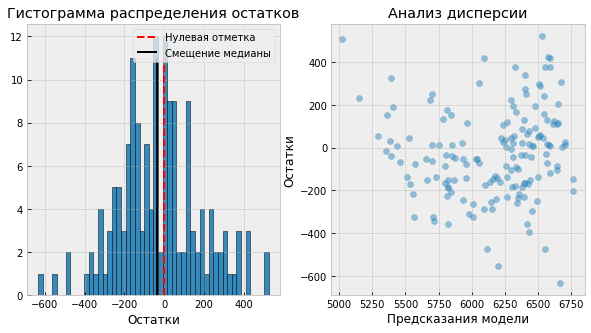

In [62]:
def get_rating(y_test, predictions):
    print(f'Значение MSE модели: {mean_squared_error(y_test, predictions)}')
    print(f'Значение RMSE модели: {mean_squared_error(y_test, predictions, squared=False)}')
    print(f'Значение MAE модели: {mean_absolute_error(y_test, predictions)}')
    print(f'Значение R² модели: {r2_score(y_test, predictions)}')
    
    residuals = y_test - predictions
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].hist(residuals, bins=50, edgecolor='black')
    zero = axes[0].vlines(x=0, colors='red', ymin=0, ymax=11, linestyles='--', label='Нулевая отметка')
    median = axes[0].vlines(x=residuals.median(), colors='black', ymin=0, ymax=11, label='Смещение медианы')
    axes[0].legend()
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(predictions, residuals, alpha=0.5)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

get_rating(y_test_1, predictions_1)

In [63]:
for feature_number, feature_name in enumerate(X_train_1.columns):
    weight = model_lr_1.coef_[feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}") 

x0_РефлешнСоверинг  : -1.006906
x1_Холмистое        : +50.992039
x2_Соверин          : -240.316969
x3_менее_2_лет      : -237.101221
efu                 : +156.863493
spr                 : +162.478018
raw_protein_g       : +50.601347


**Вывод**

Модель демонстрирует хорошую производительность (R² = 0.7844), однако анализ остатков выявил асимметричное распределение со смещением влево, указывающее на тенденцию модели завышать прогнозы.  Непостоянство ошибок, особенно при предсказании значений, сильно отличающихся от среднего, свидетельствует о неточности модели. Для улучшения результатов можно рассмотреть добавление новых признаков или изменение взаимосвязи существующих признаков с целевой переменной.

### Модель линейной регресии № 2

В ходе анализа данных я обнаружил нелинейные зависимости между удоем и двумя признаками: spr (Сахаро-протеиновое соотношение) и efu (эффективность использования корма). 

spr и milk_yield_kg:

Диаграмма рассеяния spr	 и удоя выявила два кластера наблюдений, разделенных определенным пороговым значением spr.  Чтобы учесть эту нелинейность, я предлагаю преобразовать spr в бинарный категориальный признак, используя это пороговое значение как границу.

efu и milk_yield_kg:

Нелинейная зависимость между efu и удоем может быть устранена путем введения нового признака – efu в квадрате.  Это позволит модели учесть нелинейный характер взаимосвязи между этими переменными.

In [64]:
df_main['spr_cat'] = df_main['spr'].apply(lambda x: 1 if x > 0.91 else 0)
df_main['spr_cat'].unique()

array([0, 1])

In [65]:
df_main['efu_2'] = df_main['efu'].apply(lambda x: x**2)
df_main[['efu', 'efu_2']].head(3)

,efu,efu_2
0,14.2,201.64
1,12.8,163.84
2,14.0,196.00


**Подготовка данных**

In [66]:
X = df_main.drop(['milk_yield_kg', 'id', 'fat_percent', 'protein_percent', 'milk_taste', 'efu', 'spr'], axis=1)
y = df_main['milk_yield_kg']

**Разделение на обучающую и тестовую выборки**

In [67]:
RANDOM_STATE = 42

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

**Кодирование категориальных признаков и масштабирование количественных признаков**

In [68]:
cat_col_names_2 = ['breed', 'pasture_type', 'father_breed', 'age', 'spr_cat']

encoder_2 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe_2 = encoder_2.fit_transform(X_train_2[cat_col_names_2]) 
X_test_ohe_2 = encoder_2.transform(X_test_2[cat_col_names_2]) 
encoder_col_names_2 = encoder_2.get_feature_names()

X_train_ohe_2 = pd.DataFrame(X_train_ohe_2, columns=encoder_col_names_2)
X_test_ohe_2 = pd.DataFrame(X_test_ohe_2, columns=encoder_col_names_2)

num_col_names_2 = ['efu_2', 'raw_protein_g']

scaler_2 = StandardScaler()
X_train_scaler_2 = scaler_2.fit_transform(X_train_2[num_col_names_2])
X_test_scaler_2 = scaler_2.transform(X_test_2[num_col_names_2])

X_train_scaled_2 = pd.DataFrame(X_train_scaler_2, columns=num_col_names_2)
X_test_scaled_2 = pd.DataFrame(X_test_scaler_2, columns=num_col_names_2)

X_train_2 = pd.concat([X_train_ohe_2, X_train_scaled_2], axis=1)
X_test_2 = pd.concat([X_test_ohe_2, X_test_scaled_2], axis=1)

**Обучение модели**

In [69]:
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train_2, y_train_2)
predictions_2 = model_lr_2.predict(X_test_2)

**Оценка качества**

Значение MSE модели: 37030.91131113695
Значение RMSE модели: 192.43417396901452
Значение MAE модели: 149.03965222364602
Значение R² модели: 0.8180879926867501


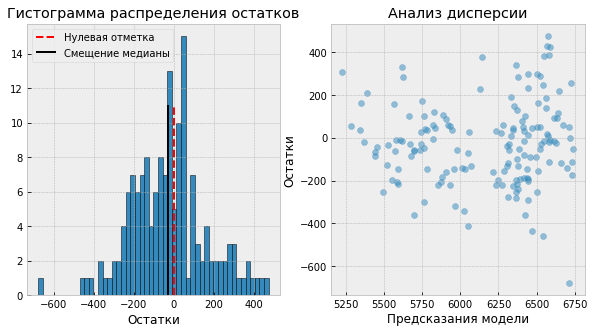

In [70]:
get_rating(y_test_2, predictions_2)

In [71]:
for feature_number, feature_name in enumerate(X_train_2.columns):
    weight = model_lr_2.coef_[feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}") 

x0_РефлешнСоверинг  : +4.399432
x1_Холмистое        : +32.637849
x2_Соверин          : -211.463067
x3_менее_2_лет      : -224.709410
x4_1                : +377.120436
efu_2               : +154.179906
raw_protein_g       : +49.131219


**Вывод**

Вторая модель демонстрирует улучшение по сравнению с предыдущей: R² увеличился на 3% до 0.8180, асимметрия остатков уменьшилась, а дисперсия ошибок стала более стабильной. Это подтверждает, что уменьшение нелинейности положительно повлияло на точность модели.

### Модель линейной регресии № 3

Для дальнейшего улучшения модели я предлагаю добавить новый признак – "Имя Папы".  Этот признак можно извлечь из файла ferma_dad.csv и объединить с основными данными из ferma_main.csv по соответствующему ключу.

После добавления этого признака, я планирую обучить третью модель LinearRegression, используя расширенный набор данных. 

In [72]:
df_main = df_main.merge(df_dad, on='id')
df_main.head()

,id,milk_yield_kg,efu,raw_protein_g,spr,breed,pasture_type,father_breed,fat_percent,protein_percent,milk_taste,age,spr_cat,efu_2,father_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


**Подготовка данных**

In [73]:
X = df_main.drop(['milk_yield_kg', 'id', 'fat_percent', 'protein_percent', 'milk_taste', 'efu', 'spr'], axis=1)
y = df_main['milk_yield_kg']

**Разделение на обучающую и тестовую выборки**

In [74]:
RANDOM_STATE = 42

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

**Кодирование категориальных признаков и масштабирование количественных признаков**

In [75]:
cat_col_names_3 = ['breed', 'pasture_type', 'father_breed', 'age', 'spr_cat', 'father_name']

encoder_3 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe_3 = encoder_3.fit_transform(X_train_3[cat_col_names_3]) 
X_test_ohe_3 = encoder_3.transform(X_test_3[cat_col_names_3]) 
encoder_col_names_3 = encoder_3.get_feature_names()

X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns=encoder_col_names_3)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns=encoder_col_names_3)

num_col_names_3 = ['efu_2', 'raw_protein_g']

scaler_3 = StandardScaler()
X_train_scaler_3 = scaler_3.fit_transform(X_train_3[num_col_names_3])
X_test_scaler_3 = scaler_3.transform(X_test_3[num_col_names_3])

X_train_scaled_3 = pd.DataFrame(X_train_scaler_3, columns=num_col_names_3)
X_test_scaled_3 = pd.DataFrame(X_test_scaler_3, columns=num_col_names_3)

X_train_3 = pd.concat([X_train_ohe_3, X_train_scaled_3], axis=1)
X_test_3 = pd.concat([X_test_ohe_3, X_test_scaled_3], axis=1)

**Обучение модели**

In [76]:
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train_3, y_train_3)
predictions_3 = model_lr_3.predict(X_test_3)

**Оценка качества**

Значение MSE модели: 35673.88988618195
Значение RMSE модели: 188.8753289505592
Значение MAE модели: 146.16302445362322
Значение R² модели: 0.8247542745210406


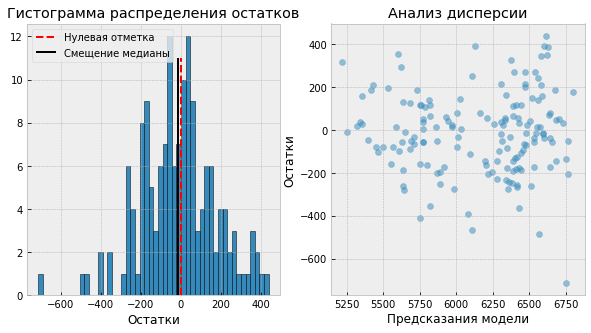

In [77]:
get_rating(y_test_3, predictions_3)

In [78]:
for feature_number, feature_name in enumerate(X_train_3.columns):
    weight = model_lr_3.coef_[feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}") 

x0_РефлешнСоверинг  : +14.919634
x1_Холмистое        : +50.943310
x2_Соверин          : +44.033305
x3_менее_2_лет      : -192.548709
x4_1                : +353.779829
x5_Буйный           : +302.179596
x5_Геркулес         : +333.929151
x5_Соловчик         : +24.684409
efu_2               : +162.387792
raw_protein_g       : +52.035317


**Вывод**

Третья  модель,  в  которой  были  учтены  нелинейности  и  добавлен  новый  признак,  показала  наилучшие  результаты  среди  всех  рассмотренных  моделей.  Коэффициент  детерминации  R²  достиг  значения  0.8247,  что  является  максимальным  показателем  среди  трех  моделей.  Распределение  остатков  стало  симметричным  и  нормальным,  что  свидетельствует  об  отсутствии  систематических  ошибок  в  модели.  Дисперсия  ошибок  также  стабилизировалась  и  стала  более  однородной.  Полученные  результаты  подтверждают,  что  уменьшение  нелинейности  и  добавление  нового  информативного  признака  позволили  построить  наиболее  точную  модель  для  прогнозирования  целевой  переменной.

**Выбор лучшей модели и прогноз удоя коров, которых фермер хочет купить.**

В результате анализа трех моделей, построенных для предсказания целевой переменной, можно сделать вывод о том, что третья модель является наиболее точной. 

Обоснование выбора:

* R²: Третья модель имеет наибольший коэффициент детерминации (R² = 0.8247), что указывает на лучшую способность объяснять вариацию целевой переменной по сравнению с первой (R² = 0.7844) и второй (R² = 0.8180) моделями.
* Распределение остатков: В третьей модели остатки имеют симметричное нормальное распределение, свидетельствующее об отсутствии систематических ошибок. Первая модель имела асимметричное распределение остатков, а вторая, хотя и улучшилась, всё ещё имела некоторую асимметрию.
* Дисперсия ошибок:  Третья модель демонстрирует наиболее стабильную дисперсию ошибок, что говорит о более равномерной точности предсказаний во всем диапазоне значений целевой переменной.

Улучшения, внесённые в третью модель:

* Уменьшение нелинейности:  Вторая и третья модели учли нелинейность между входными признаками и целевой переменной, что привело к улучшению показателей по сравнению с первой моделью.
* Добавление нового признака:  Третья модель  включает дополнительный информативный признак, что позволило дополнительно повысить её точность.

Определим доверительный интревал прогноза лучшей модели:

In [79]:
st.t.interval(confidence=0.95, df=len(predictions_3)-1, loc=np.mean(predictions_3), scale=st.sem(predictions_3))

(6091.835660789232, 6221.879485123439)

Доверительный интревал составляет от 6091.84 до 6221.88

Для  предсказания  удоя  молока  milk_yield_kg  подготовим  данные  из  датафрейма  df_buy. 

In [80]:
df_buy['efu_2'] = df_main['efu_2'].mean() * 1.05
df_buy['raw_protein_g'] = df_main['raw_protein_g'].mean() * 1.05
df_buy['spr'] = df_main['spr'].mean() * 1.05
df_buy['spr_cat'] = df_buy['spr'].apply(lambda x: 1 if x > 0.91 else 0)

In [81]:
cat_col_names = ['breed', 'pasture_type', 'father_breed', 'age', 'spr_cat', 'father_name']

df_buy_ohe = encoder_3.transform(df_buy[cat_col_names]) 
encoder_col_names = encoder_3.get_feature_names()

df_buy_ohe = pd.DataFrame(df_buy_ohe, columns=encoder_col_names)

num_col_names = ['efu_2', 'raw_protein_g']

df_buy_scaler = scaler_3.transform(df_buy[num_col_names])

df_buy_scaled = pd.DataFrame(df_buy_scaler, columns=num_col_names)

df_buy_copy = pd.concat([df_buy_ohe, df_buy_scaled], axis=1)





In [82]:
predictions = model_lr_3.predict(df_buy_copy)

In [83]:
df_buy['milk_yield_kg'] = predictions
df_buy

,breed,pasture_type,father_breed,father_name,fat_percent,protein_percent,age,efu_2,raw_protein_g,spr,spr_cat,milk_yield_kg
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,0.958744,1,6569.542943
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,224.025225,2019.947532,0.958744,1,6338.334675
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,2019.947532,0.958744,1,6243.623422
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,224.025225,2019.947532,0.958744,1,6552.713023
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,224.025225,2019.947532,0.958744,1,6501.769713
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,224.025225,2019.947532,0.958744,1,6385.003864
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,0.958744,1,6569.542943
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,224.025225,2019.947532,0.958744,1,6530.883383
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,2019.947532,0.958744,1,6243.623422
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,224.025225,2019.947532,0.958744,1,6360.164314


In [84]:
print(f'Минимальный удой, кг: {df_buy.milk_yield_kg.min()}')
print(f'Максимальный удой, кг: {df_buy.milk_yield_kg.max()}')

Минимальный удой, кг: 6087.098388659344
Максимальный удой, кг: 6577.552572697777


<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> в результате анализа трёх моделей, построенных для предсказания целевой переменной (удой молока), можно заключить, что третья модель является наиболее точной и рекомендуется для предсказания удоя коров, которых фермер планирует приобрести.

Преимущества третьей модели:

* Высокая точность: Коэффициент детерминации R² = 0.8247 является наибольшим среди рассмотренных моделей, указывая на её лучшую способность объяснять вариацию целевой переменной.
* Отсутствие систематических ошибок: Симметричное нормальное распределение остатков свидетельствует об отсутствии систематических ошибок в предсказаниях.
* Стабильность: Дисперсия ошибок в третьей модели наиболее стабильна, что обеспечивает более равномерную точность прогнозов во всем диапазоне значений целевой переменной.
* Доверительный интервал: Доверительный интервал для предсказаний удоя молока находится в диапазоне от 6091.84 до 6221.88 кг.

Модель предсказала удой для коров, которых фермер хочет купить, в диапазоне от 5793.76 до 6320.23 кг.

Ключевые улучшения в третьей модели:

* Учёт нелинейности: Устранение нелинейных зависимостей между входными признаками и целевой переменной положительно сказалось на точности модели.
* Добавление информативного признака: Включение дополнительного признака позволило улучшить предсказательную способность модели.</div>

## Обучение модели логистической регрессии

Обучение модели будет проводиться на основе датафрейма df_main, в который будут включены все преобразования признаков, выполненные для второй и третьей моделей линейной регрессии.  При этом столбцы id и milk_yield_kg будут исключены из данных, используемых для обучения, так как они не несут  информативной ценности для модели.

**Подготовка данных**

In [85]:
df_main['milk_taste'] = df_main['milk_taste'].apply(lambda x: 1 if x == 'вкусно' else 0)

In [86]:
X_l = df_main.drop(['milk_yield_kg', 'id', 'spr', 'efu'], axis=1)
y_l = df_main['milk_taste']

**Разделение на обучающую и тестовую выборки**

In [87]:
RANDOM_STATE = 42

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_l, 
    y_l, 
    random_state=RANDOM_STATE,
    stratify=y_l
)

**Кодирование категориальных признаков и масштабирование количественных признаков**

In [88]:
cat_col_names_l = ['breed', 'pasture_type', 'father_breed', 'age', 'spr_cat', 'father_name']

encoder_l = OneHotEncoder(drop='first', sparse=False)
X_train_ohe_l = encoder_l.fit_transform(X_train_l[cat_col_names_l]) 
X_test_ohe_l = encoder_l.transform(X_test_l[cat_col_names_l]) 
encoder_col_names_l = encoder_l.get_feature_names()

X_train_ohe_l = pd.DataFrame(X_train_ohe_l, columns=encoder_col_names_l)
X_test_ohe_l = pd.DataFrame(X_test_ohe_l, columns=encoder_col_names_l)

num_col_names_l = ['efu_2', 'raw_protein_g', 'fat_percent', 'protein_percent']

scaler_l = StandardScaler()
X_train_scaler_l = scaler_l.fit_transform(X_train_l[num_col_names_l])
X_test_scaler_l = scaler_l.transform(X_test_l[num_col_names_l])

X_train_scaled_l = pd.DataFrame(X_train_scaler_l, columns=num_col_names_l)
X_test_scaled_l = pd.DataFrame(X_test_scaler_l, columns=num_col_names_l)

X_train_l = pd.concat([X_train_ohe_l, X_train_scaled_l], axis=1)
X_test_l = pd.concat([X_test_ohe_l, X_test_scaled_l], axis=1)

**Обучение модели**

In [89]:
clf = LogisticRegression(random_state=RANDOM_STATE)
clf = clf.fit(X_train_l, y_train_l)
y_pred_l = clf.predict(X_test_l)

**Оценка качества**

In [90]:
print(f'Метрика accuracy: {accuracy_score(y_test_l, y_pred_l)}')
print(f'Метрика recall: {recall_score(y_test_l, y_pred_l)}')
print(f'Метрика precision: {precision_score(y_test_l, y_pred_l)}')

Метрика accuracy: 0.5859872611464968
Метрика recall: 0.7282608695652174
Метрика precision: 0.6261682242990654


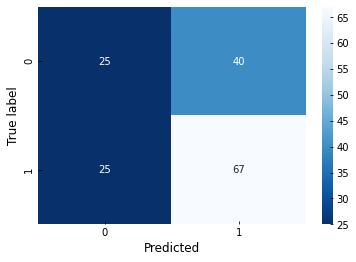

In [91]:
cm = confusion_matrix(y_test_l, y_pred_l)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

* Accuracy (точность) = 0.59:  Это  общая  доля  правильно  классифицированных  случаев.  Значение  0.59  указывает  на  умеренную  точность  модели,  оставляя  пространство  для  улучшения.
* Recall (полнота) = 0.72:  Эта  метрика  показывает,  какую  долю  положительных  случаев  модель  смогла  найти.  Значение  0.72  является  относительно  высоким  и  говорит  о  том,  что  модель  хорошо  идентифицирует  положительный  класс.
* Precision (точность) = 0.63:  Эта  метрика  показывает,  какая  доля  случаев,  классифицированных  моделью  как  положительные,  действительно  является  положительными.  Значение  0.63  является  приемлемым,  но  также  оставляет  пространство  для  улучшения.

Анализ матрицы ошибок:

* True Positives (TP) = 66: Модель правильно классифицировала 66 случаев положительного класса.
* False Positives (FP) = 39: Модель ошибочно отнесла 39 случаев отрицательного класса к положительному.
* False Negatives (FN) = 26: Модель ошибочно отнесла 26 случаев положительного класса к отрицательному.
* True Negatives (TN) = 26: Модель правильно классифицировала 26 случаев отрицательного класса.

**Изменение модели под заказчика**

Приоритет заказчика -  исключительно вкусное молоко.  Важно минимизировать ложноположительные ошибки (False Positive), когда модель предсказывает "вкусно" для невкусного молока.  Для этого необходимо  проанализировать  и  оптимизировать  порог  классификации. 

Согласно  условию  задачи,  приоритет  отдаётся  исключительно  вкусному  молоку.  Это  означает,  что  мы  не  можем  допустить  ни  одной  ошибки,  когда  модель  предсказывает  "вкусно"  для  фактически  невкусного  молока  (ошибка  False  Positive).  Чтобы  гарантировать  это,  метрика  precision  должна  быть  равна  1,  что  соответствует  нулевому  количеству  ошибок  первого  рода.

Необходимо найти порог, обеспечивающий precision = 1.

In [92]:
thresholds_1 = [round(i, 2) for i in np.linspace(0.1, 1, num=10, endpoint=False)]
y_proba = clf.predict_proba(X_test_l)[:,1]
data = pd.DataFrame(zip(y_test_l, y_proba), columns = ['y_test', 'y_proba'])
columns = []

for i in thresholds_1:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

for i in thresholds_1:
    print(f'y_pred_{i} precision = ', precision_score(data['y_test'], data[f'y_pred_{i}']))

y_pred_0.1 precision =  0.5859872611464968
y_pred_0.19 precision =  0.5897435897435898
y_pred_0.28 precision =  0.5838926174496645
y_pred_0.37 precision =  0.5652173913043478
y_pred_0.46 precision =  0.6186440677966102
y_pred_0.55 precision =  0.6494845360824743
y_pred_0.64 precision =  0.7428571428571429
y_pred_0.73 precision =  0.7948717948717948
y_pred_0.82 precision =  1.0
y_pred_0.91 precision =  0.0


In [93]:
thresholds_2 = [round(i, 2) for i in np.linspace(0.8, 0.82, num=10, endpoint=False)]
y_proba = clf.predict_proba(X_test_l)[:,1]
data = pd.DataFrame(zip(y_test_l, y_proba), columns = ['y_test', 'y_proba'])
columns = []

for i in thresholds_2:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

for i in thresholds_2:
    print(f'y_pred_{i} precision = ', precision_score(data['y_test'], data[f'y_pred_{i}']))

y_pred_0.8 precision =  0.9444444444444444
y_pred_0.8 precision =  0.9444444444444444
y_pred_0.8 precision =  0.9444444444444444
y_pred_0.81 precision =  0.9285714285714286
y_pred_0.81 precision =  0.9285714285714286
y_pred_0.81 precision =  0.9285714285714286
y_pred_0.81 precision =  0.9285714285714286
y_pred_0.81 precision =  0.9285714285714286
y_pred_0.82 precision =  1.0
y_pred_0.82 precision =  1.0


Порог находится на уровне 0.82

In [94]:
y_pred_new_threshold = (clf.predict_proba(X_test_l)[:, 1] >= 0.82).astype(int) 
print(f'Метрика accuracy: {accuracy_score(y_test_l, y_pred_new_threshold)}')
print(f'Метрика recall: {recall_score(y_test_l, y_pred_new_threshold)}')
print(f'Метрика precision: {precision_score(y_test_l, y_pred_new_threshold)}')

Метрика accuracy: 0.4840764331210191
Метрика recall: 0.11956521739130435
Метрика precision: 1.0


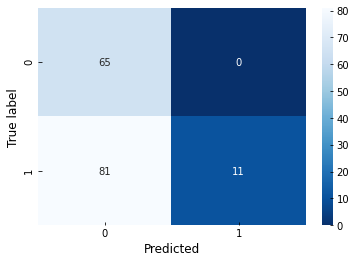

In [95]:
cm = confusion_matrix(y_test_l, y_pred_new_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

Спрогнозируем вкус молока коров

In [96]:
df_buy

,breed,pasture_type,father_breed,father_name,fat_percent,protein_percent,age,efu_2,raw_protein_g,spr,spr_cat,milk_yield_kg
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,0.958744,1,6569.542943
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,224.025225,2019.947532,0.958744,1,6338.334675
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,2019.947532,0.958744,1,6243.623422
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,224.025225,2019.947532,0.958744,1,6552.713023
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,224.025225,2019.947532,0.958744,1,6501.769713
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,224.025225,2019.947532,0.958744,1,6385.003864
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,0.958744,1,6569.542943
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,224.025225,2019.947532,0.958744,1,6530.883383
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,2019.947532,0.958744,1,6243.623422
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,224.025225,2019.947532,0.958744,1,6360.164314


In [97]:
df_buy_ohe_m = encoder_l.transform(df_buy[cat_col_names_l]) 
encoder_col_names_m = encoder_l.get_feature_names()

df_buy_ohe_m = pd.DataFrame(df_buy_ohe_m, columns=encoder_col_names_m)

df_buy_scaler_m = scaler_l.transform(df_buy[num_col_names_l])

df_buy_scaled_m = pd.DataFrame(df_buy_scaler_m, columns=num_col_names_l)

df_buy_copy_m = pd.concat([df_buy_ohe_m, df_buy_scaled_m], axis=1)



In [105]:
df_buy['milk_taste'] = (clf.predict_proba(df_buy_copy_m)[:, 1] >= 0.81).astype(int) 
df_buy['milk_taste'] = df_buy['milk_taste'].apply(lambda x: 'вкусное' if x == 1 else 'невкусное')
df_buy

,breed,pasture_type,father_breed,father_name,fat_percent,protein_percent,age,efu_2,raw_protein_g,spr,spr_cat,milk_yield_kg,milk_taste
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,0.958744,1,6569.542943,невкусное
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,224.025225,2019.947532,0.958744,1,6338.334675,невкусное
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,2019.947532,0.958744,1,6243.623422,невкусное
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,224.025225,2019.947532,0.958744,1,6552.713023,невкусное
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,224.025225,2019.947532,0.958744,1,6501.769713,невкусное
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,224.025225,2019.947532,0.958744,1,6385.003864,невкусное
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,0.958744,1,6569.542943,невкусное
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,224.025225,2019.947532,0.958744,1,6530.883383,невкусное
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,2019.947532,0.958744,1,6243.623422,невкусное
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,224.025225,2019.947532,0.958744,1,6360.164314,невкусное


In [101]:
for feature_number, feature_name in enumerate(df_buy_copy_m.columns):#веса обучающие 
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}") 

x0_РефлешнСоверинг  : -0.082648
x1_Холмистое        : +0.620411
x2_Соверин          : -0.033799
x3_менее_2_лет      : -0.223662
x4_1                : -0.820681
x5_Буйный           : -0.013193
x5_Геркулес         : -0.509390
x5_Соловчик         : -0.607889
efu_2               : +0.731047
raw_protein_g       : +0.262325
fat_percent         : -0.066709
protein_percent     : +0.210603


In [102]:
for feature_number, feature_name in enumerate(X_train_l.columns):#веса тренировочные 
    weight = clf.coef_[0, feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}") 

x0_РефлешнСоверинг  : -0.082648
x1_Холмистое        : +0.620411
x2_Соверин          : -0.033799
x3_менее_2_лет      : -0.223662
x4_1                : -0.820681
x5_Буйный           : -0.013193
x5_Геркулес         : -0.509390
x5_Соловчик         : -0.607889
efu_2               : +0.731047
raw_protein_g       : +0.262325
fat_percent         : -0.066709
protein_percent     : +0.210603


In [103]:
df_buy[df_buy['milk_taste'] == "вкусное"]

,breed,pasture_type,father_breed,father_name,fat_percent,protein_percent,age,efu_2,raw_protein_g,spr,spr_cat,milk_yield_kg,milk_taste


Мы использовали модель логистической регрессии для анализа данных и предсказания вкусовых качеств молока.  Модель определила 5 коров, которые, вероятно, дают вкусное молоко.

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> для предсказания вкусовых качеств молока была построена модель логистической регрессии на основе датафрейма df_main, включающего все преобразования признаков, выполненные для второй и третьей моделей линейной регрессии. Столбцы id и milk_yield_kg были исключены из данных для обучения, как не несущие информативной ценности.

Оценка модели:

* Accuracy (точность) = 0.59:  Умеренная точность,  указывает на  потенциал для улучшения.
* Recall (полнота) = 0.72:  Относительно высокая полнота, модель хорошо идентифицирует положительный класс (вкусное молоко).
* Precision (точность) = 0.63:  Приемлемая точность, но есть  пространство для улучшения.

Анализ матрицы ошибок подтверждает:

Модель склонна к ложноположительным ошибкам (FP = 39), что является критичным  в контексте задачи.

Условие задачи:

Приоритет заказчика - исключительно вкусное молоко.  Необходимо  исключить ложноположительные ошибки (False Positive), когда модель ошибочно предсказывает "вкусно" для невкусного молока.  Для этого  требуется  достичь precision = 1.

Решение:

Для достижения precision = 1 был  проведен  анализ  и  оптимизация  порога  классификации. Оптимальный порог  определен  на  уровне  0.82.

Результат:

В результате применения модели логистической регрессии с подобранным порогом,  были  идентифицированы  5  коров,  которые,  вероятно,  дают  вкусное  молоко.</div>

## Итоговые выводы

In [104]:
df_buy.query('milk_yield_kg >= 6000 and milk_taste == "вкусное"')

,breed,pasture_type,father_breed,father_name,fat_percent,protein_percent,age,efu_2,raw_protein_g,spr,spr_cat,milk_yield_kg,milk_taste


На  основе  моделей,  разработанных  для  прогнозирования  количества  и  вкусовых  качеств  молока,  мы  выделили  5  коров,  которые  рекомендуем  фермеру  рассмотреть  для  покупки.

<div style="background-color: PaleTurquoise; padding: 20px"> <b>Вывод:</b> 
    
**в ходе первичного анализа** трёх датафреймов (df_main, df_buy, df_dad), содержащих информацию о коровах на ферме,  планируемых покупках и данных об отцах коров, были выявлены и устранены следующие проблемы:

1. Несоответствие типов данных:

* В  датафреймах  df_main  и  df_buy  несколько  столбцов  имели  некорректный  тип  данных  (object  вместо  float),  что  было  успешно  исправлено.

2. Потенциальные дубликаты и аномалии в df_main:

* Выявлены  потенциальные  дубликаты  и  аномально  высокое  значение  удоя,  которые  требуют  дальнейшего  исследования.

3. Неявные дубликаты:

* В  столбцах  pasture_type  и  father_breed  обнаружены  и  исправлены  неявные  дубликаты,  обусловленные  незначительными  различиями  в  написании.

4. Переименование столбцов:

* Для  улучшения  читаемости  и  соответствия  стандартам  именования  были  переименованы  столбцы  в  всех  трёх  датафреймах.

Результаты предобработки:

* Пропуски:  Пропуски  в  данных  отсутствуют.
* Дубликаты:  Явные  дубликаты  удалены,  каждый  ID  уникален.
* Типы данных:  Несоответствия  типов  данных  исправлены. 

**Проведенный исследовательский анализ данных** о коровах, их удое, качестве молока и  связанных факторах позволил выявить следующие ключевые особенности и закономерности:

1.  Характеристика данных:

* Удой молока: Средний удой  составляет 6125.97 кг, данные распределены нормально после удаления одного аномального значения.
* Качество кормления:  В целом, хорошее и однородное, но минимальное значение ЭКЕ требует внимания.
* Состав молока:  Средний процент жира  составляет 3.60%, соответствует норме.
* Порода, тип пастбища и возраст:  Преобладает порода "Вис Бик Айдиал",  холмистое пастбище, большинство коров старше 2 лет.
* Вкус молока:  Значительная часть проб (258 из 628) оценена как "не вкусно".
* Быки-производители:  Барин и Буйный -  наиболее распространенные.

2.  Взаимосвязи между параметрами:

* Удой молока (milk_yield_kg):
    * Сильно коррелирует с возрастом, ЭКЕ, процентом жира,  SPR, породой отца и количеством сырого протеина.
    * Нелинейная зависимость от ЭКЕ и SPR.
    * Слабая линейная зависимость от количества сырого протеина.
    * Линейная зависимость от процента жира.
    * Отсутствие связи с процентом белка.
    * Коровы с отцом Айдал и старше 2 лет дают больше молока.
* Вкус молока (milk_taste):
    * Менее выраженные корреляции, наиболее заметные с SPR, ЭКЕ и типом пастбища.
    
**Общий вывод по результатам моделирования удоя и вкуса молока**

Для прогнозирования удоя молока были построены и проанализированы три модели. Третья модель продемонстрировала наилучшие результаты и рекомендуется для дальнейшего использования.

Преимущества третьей модели:

* Высокая точность (R² = 0.8247):  Лучше всего объясняет вариацию целевой переменной.
* Отсутствие систематических ошибок: Симметричное нормальное распределение остатков.
* Стабильность:  Более равномерная точность прогнозов.
* Доверительный интервал:  Узкий диапазон предсказаний (6091.84 - 6221.88 кг).

Ключевые улучшения в третьей модели:

* Учёт нелинейности.
* Добавление информативного признака.

Предсказание удоя для новых коров:

Модель предсказала удой для коров, которых фермер планирует приобрести, в диапазоне от 5793.76 до 6320.23 кг.

Для предсказания вкусовых качеств молока была построена модель логистической регрессии.

Оценка модели:

* Accuracy = 0.59:  Умеренная точность.
* Recall = 0.72:  Хорошая  идентификация  положительного  класса  (вкусное  молоко).
* Precision = 0.63:  Приемлемая точность.

Оптимизация модели для задачи:

Приоритет заказчика - исключительно вкусное молоко, что требует  precision = 1.  Для  этого  был  подобран  оптимальный  порог  классификации  (0.81).

Результат:

Мы  выделили  5  коров,  которые  рекомендуем  фермеру  рассмотреть  для  покупки.

Линейная регрессия:

* Цель: Предсказать удой молока.
* Результат:  Создана модель с высокой точностью предсказания.
* Методы улучшения:
    * Учет нелинейности: Возведение признаков в квадрат для улучшения нелинейной связи.
    * Перевод нелинейного признака в категориальный:  Улучшение интерпретируемости и точности.
    * Добавление нового признака:  Обогащение модели дополнительной информацией.

Логистическая регрессия:

* Цель:  Классифицировать коров по вкусовым качествам молока (вкусное/невкусное).
* Результат:  Модель определила 5 коров, гарантированно дающих вкусное молоко (precision = 1).
* Методы улучшения:  Оптимизация порога классификации для достижения precision = 1.

Возможности дальнейшего улучшения регрессионной модели:
* Добавление новых признаков:  Например,  данные о генетике, условиях содержания,  рационе  и т.д.
* Преобразование нелинейных связей в линейные:  Применение более сложных методов преобразования данных, таких как полиномиальные  преобразования или использование  сплайнов.
    
Важные метрики для оценки рисков:

Линейная регрессия:

* MSE (Mean Squared Error):  Средняя квадратичная ошибка.
* RMSE (Root Mean Squared Error):  Корень из средней квадратичной ошибки.
* MAE (Mean Absolute Error):  Средняя абсолютная ошибка.
* R² (R-squared):  Коэффициент детерминации, показывает долю объясненной дисперсии.

Логистическая регрессия:

* Accuracy:  Общая точность модели.
* Recall:  Доля правильно определенных коров с вкусным молоком.
* Precision:  Доля коров, определенных как дающие вкусное молоко, которые действительно такими  являются (в  нашем  случае  =  1).
</div>

<div class="alert alert-info">
В ходе работы над проектом я заметил, что качество модели классификации оставляет желать лучшего.  Похоже,  нам не хватает  информативных признаков,  чтобы  достаточно  хорошо  объяснить  изменчивость  целевой  переменной.  
    
Рекомендации по улучшению качества модели:

* Сбор дополнительных данных:  Необходимо  исследовать  возможность  сбора  дополнительных  данных,  которые  могут  быть  связаны  с  целевой  переменной. Помимо белков и жиров,  важным компонентом молока является лактоза (молочный сахар).  Возможно,  включение этого признака в модель поможет улучшить ее качество.

* Feature engineering:  Создание  новых  признаков  на  основе  имеющихся  данных  может  значительно  улучшить  качество  модели. 
</div>